In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-housing-dataset/Boston (1).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/the-boston-housing-dataset/Boston (1).csv')

In [4]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


Preprocessing

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.shape

(506, 14)

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Data Visualization

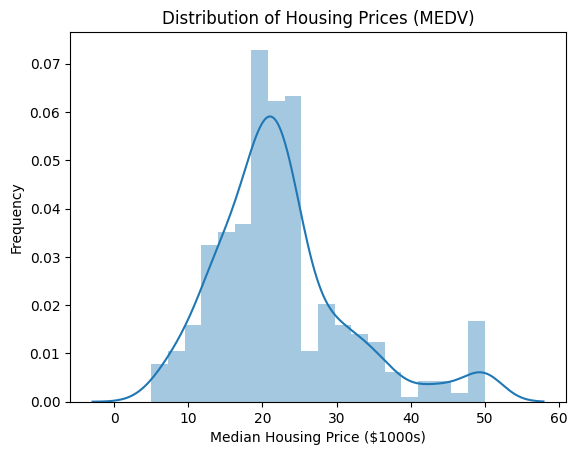

In [10]:
#Price Distribution
sns.distplot(df['MEDV'], bins=20, kde=True)
plt.title('Distribution of Housing Prices (MEDV)')
plt.xlabel('Median Housing Price ($1000s)')
plt.ylabel('Frequency')
plt.show()

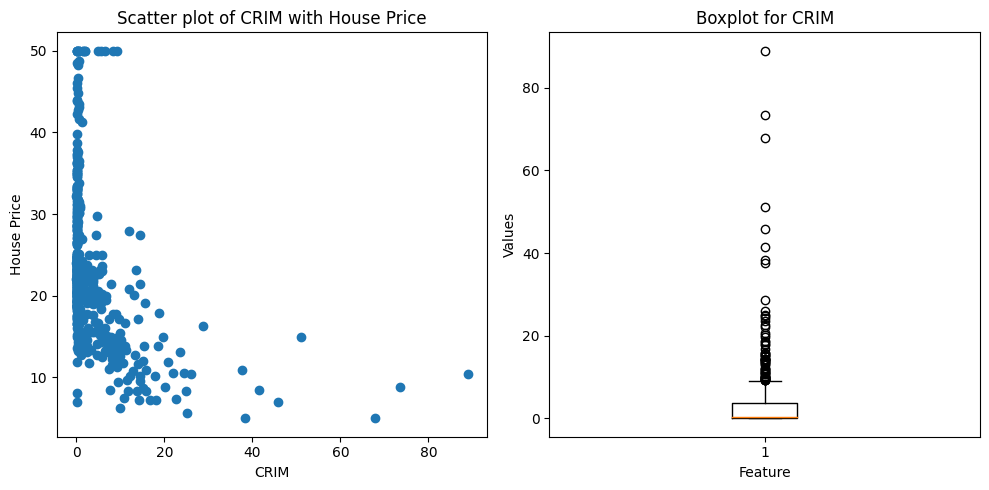

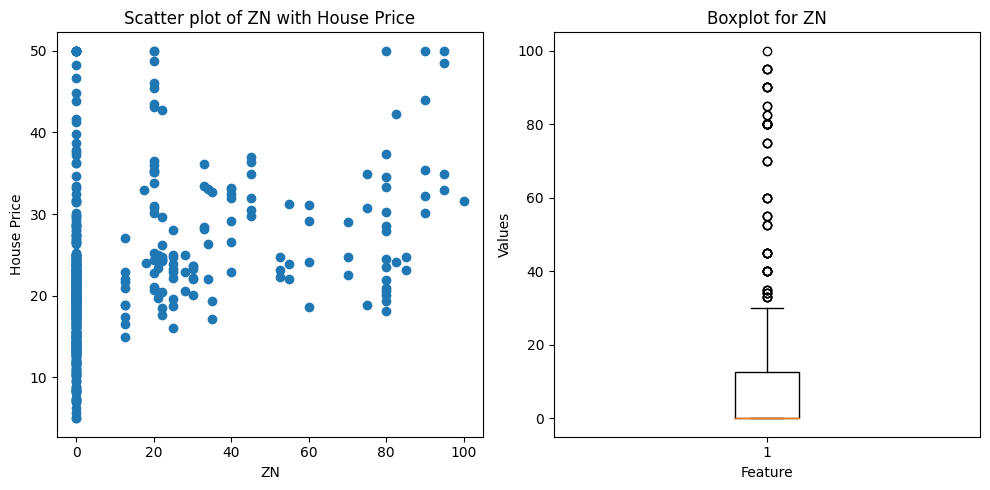

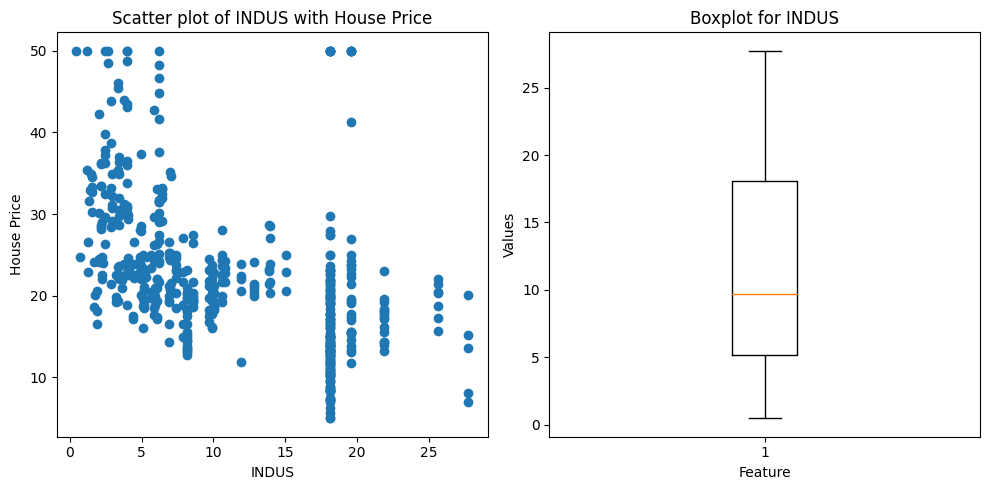

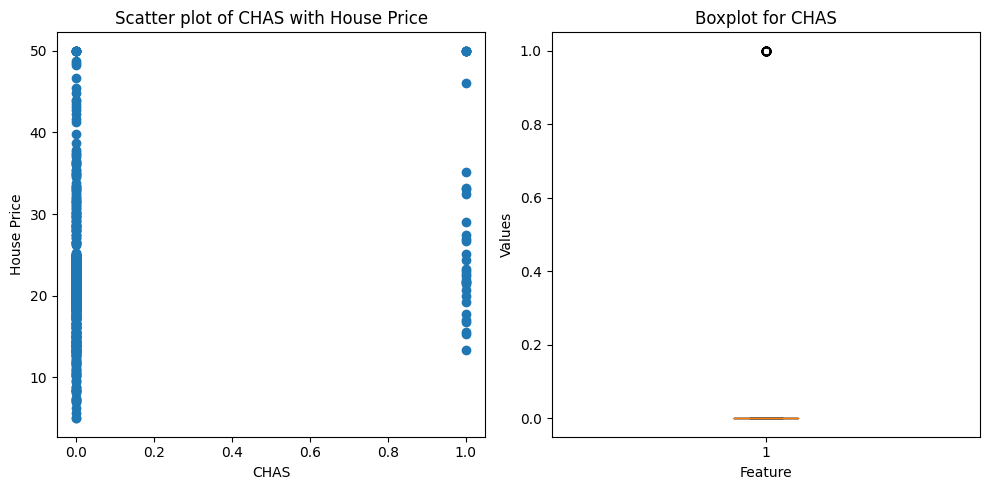

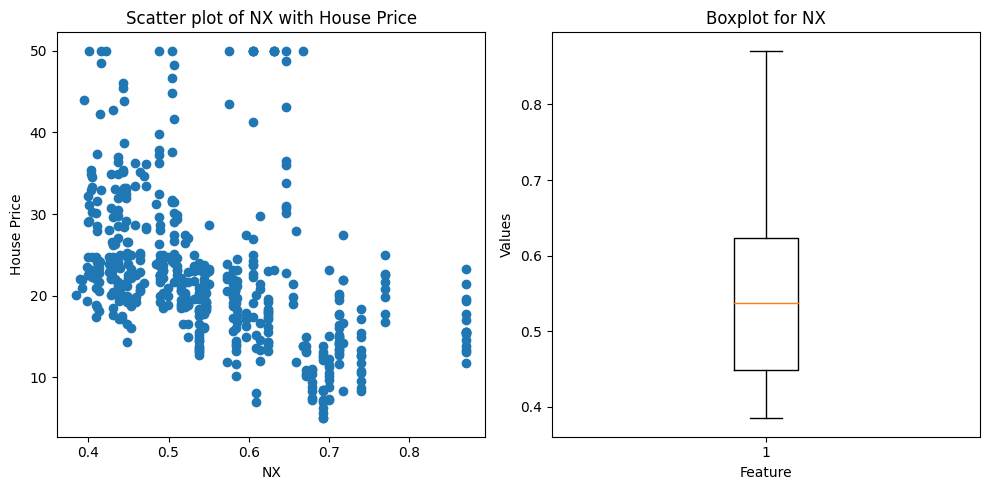

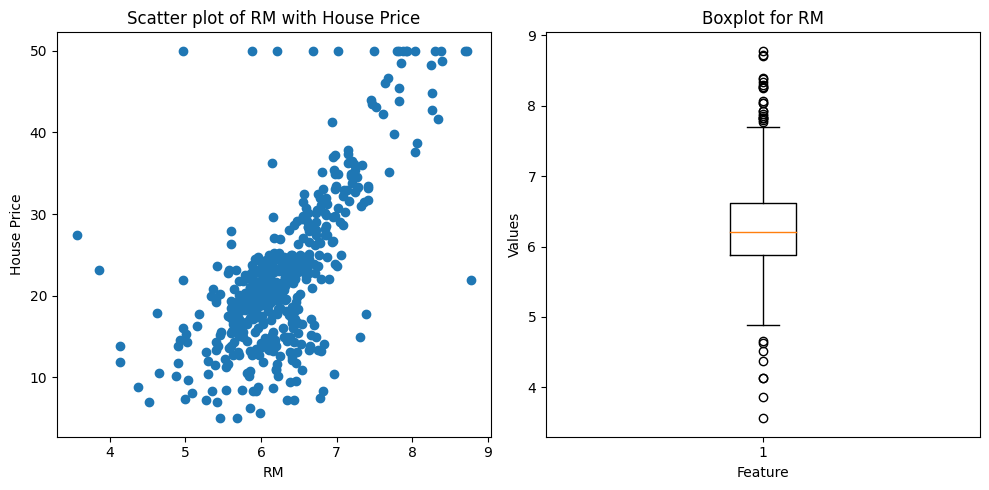

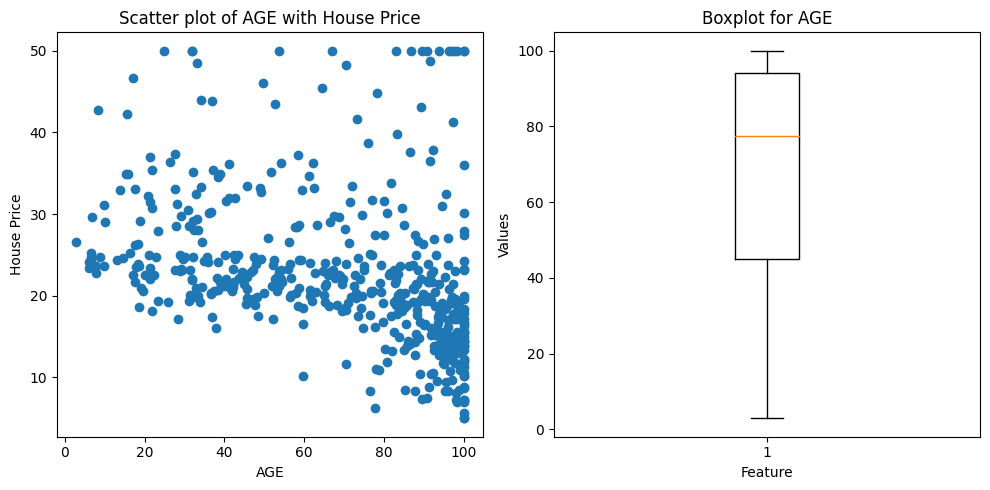

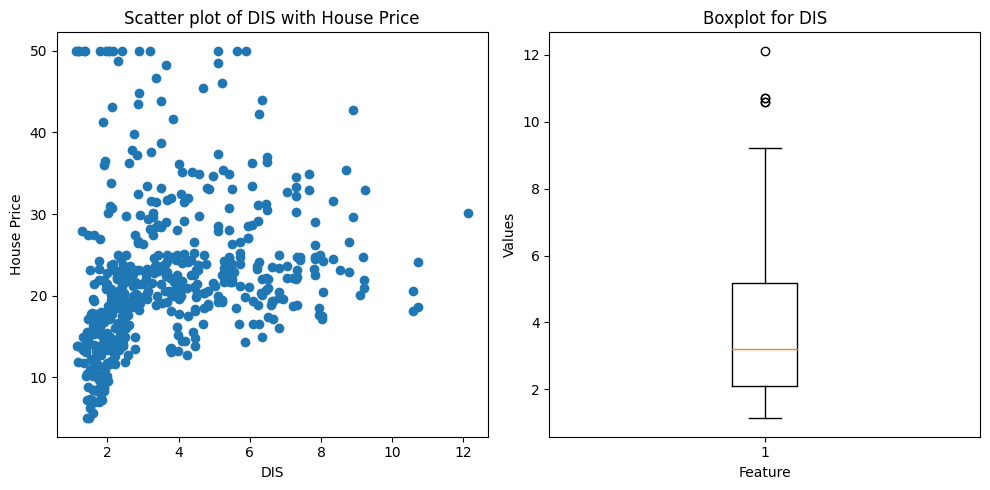

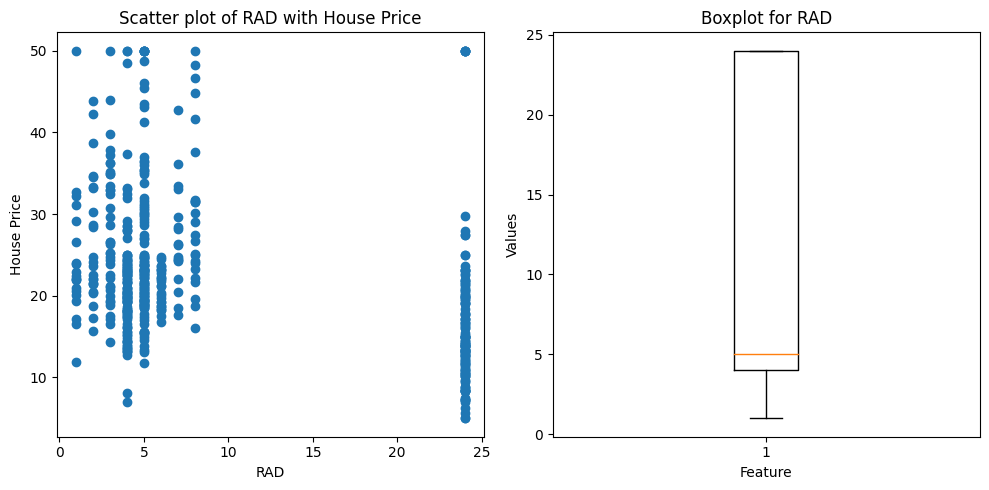

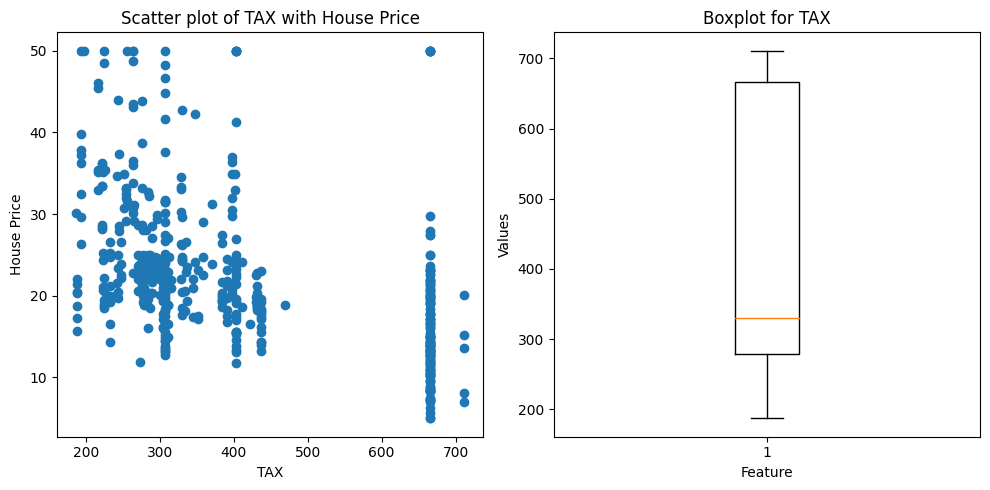

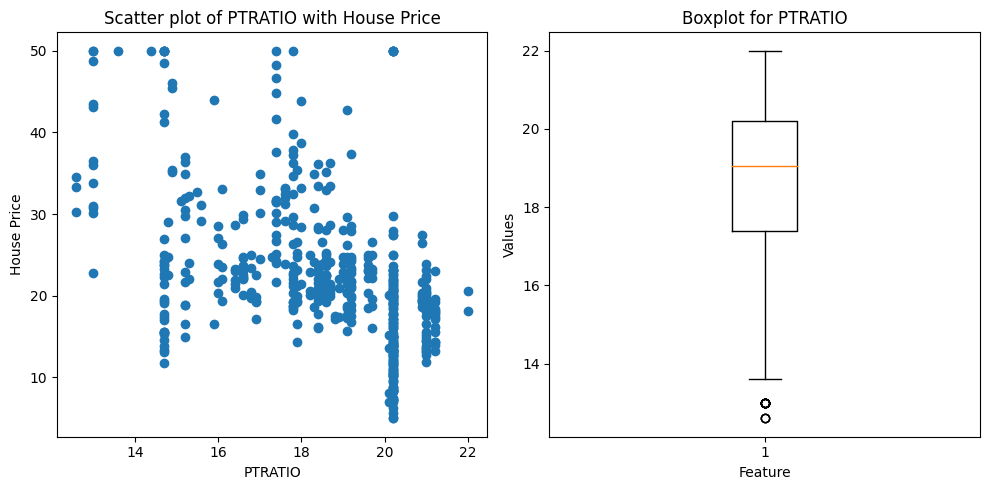

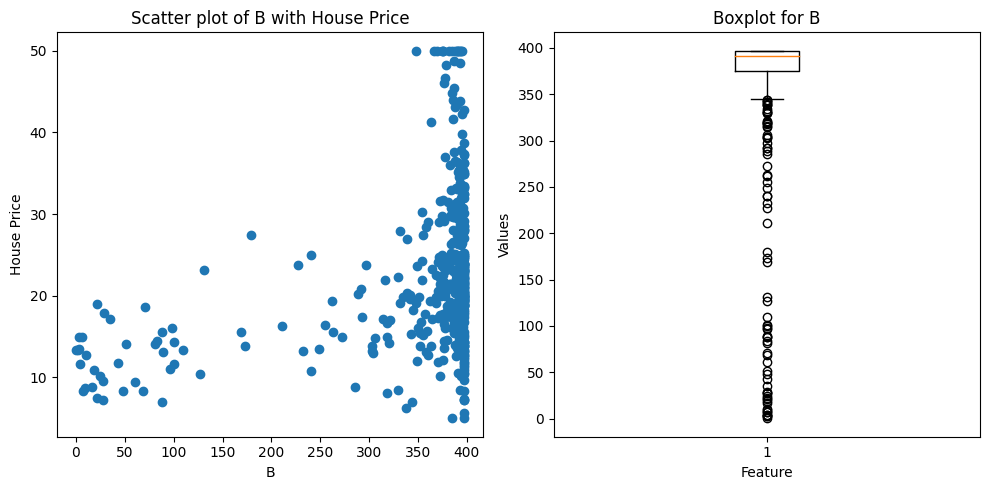

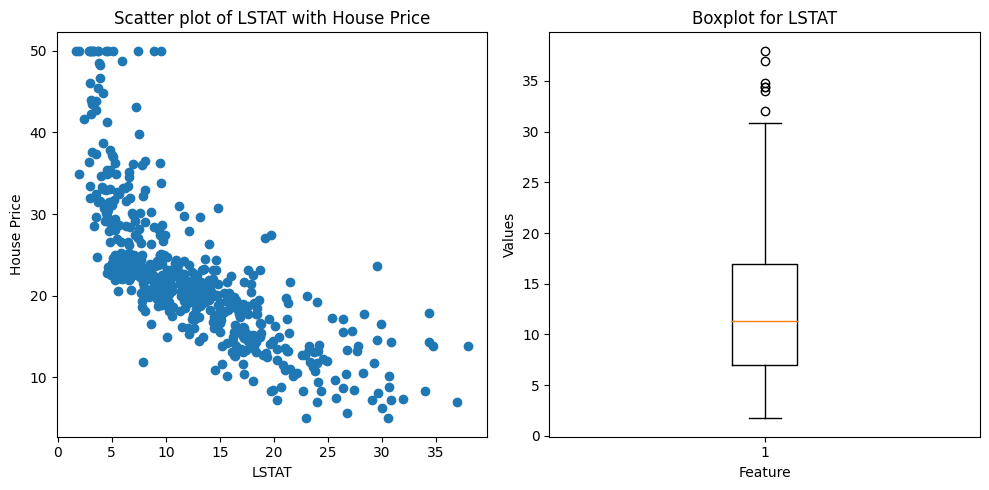

In [11]:
#to identify the outliers
features=df.drop(columns='MEDV').columns
for feature in features:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  
    
    # Scatter plot of feature with target variable
    ax[0].scatter(df[feature], df['MEDV'])
    ax[0].set_title(f'Scatter plot of {feature} with House Price')
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel('House Price')

    # Boxplot of the feature
    ax[1].boxplot(df[feature])
    ax[1].set_title(f'Boxplot for {feature}')
    ax[1].set_xlabel('Feature')
    ax[1].set_ylabel('Values')

    plt.tight_layout()  
    plt.show();

In [12]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [14]:
##standardizing the dataset
scaler=StandardScaler()

In [15]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
lr_pred=lr.predict(X_test)

In [18]:
error = mean_absolute_percentage_error(lr_pred,y_test)
print("Accuracy of Linear Regressor is :%.2f "%((1 - error)*100),'%')

Accuracy of Linear Regressor is :61.68  %


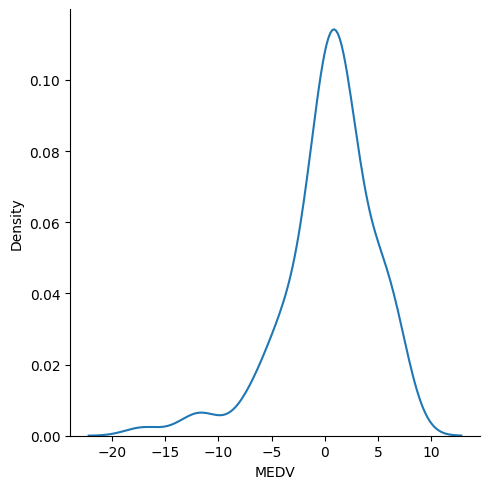

In [19]:
sns.displot(lr_pred-y_test,kind='kde')

In [20]:
# Random Forest Regressor 
rfr = RandomForestRegressor(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

In [21]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [22]:
rfr_pred = rfr.predict(X_test)

In [23]:
# Accuracy Score of Model
error = mean_absolute_percentage_error(rfr_pred,y_test)
print("Accuracy of Random Forest Regressor is :%.2f "%((1 - error)*100),'%')

Accuracy of Random Forest Regressor is :90.32  %


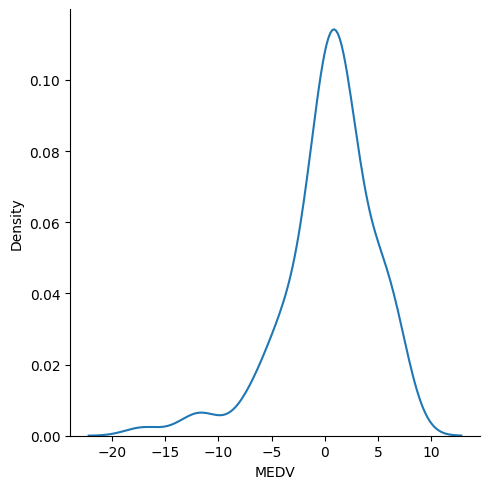

In [24]:
sns.displot(lr_pred-y_test,kind='kde')

In [25]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor(max_depth=5)

In [26]:
# Fit the model on Training dataset
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [27]:
dtr_pred=dtr.predict(X_test)

In [28]:
# Accuracy Score of Model
error = mean_absolute_percentage_error(dtr_pred,y_test)
print("Accuracy of Decision Tree Regressor is :%.2f "%((1 - error)*100),'%')

Accuracy of Decision Tree Regressor is :83.08  %


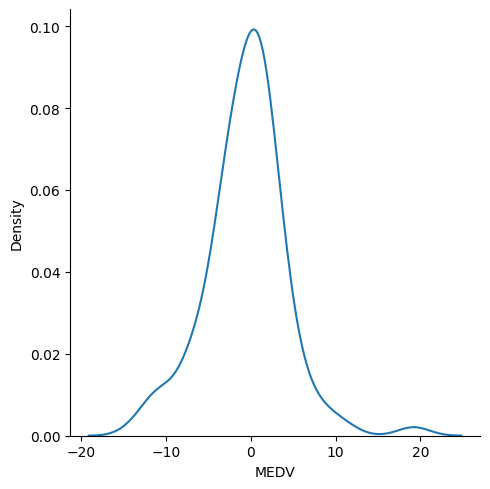

In [29]:
sns.displot(dtr_pred-y_test,kind='kde')

In [30]:
xgb_m=xgb.XGBRegressor()
xgb_m.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
xgb_pred=xgb_m.predict(X_test)

In [32]:
# Accuracy Score of Model
error = mean_absolute_percentage_error(xgb_pred,y_test)
print("Accuracy of XGBoost Regressor is :%.2f "%((1 - error)*100),'%')

Accuracy of XGBoost Regressor is :89.97  %


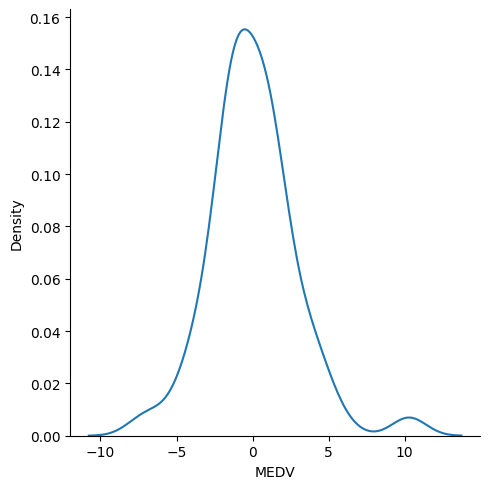

In [33]:
sns.displot(xgb_pred-y_test,kind='kde')

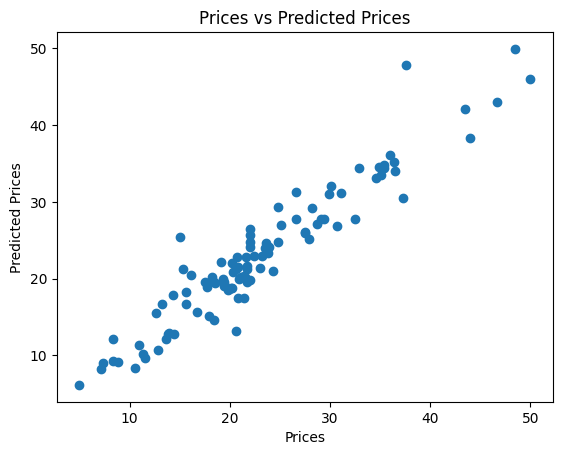

In [34]:

# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, xgb_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted Prices')
plt.show()